<div>
<img src="Images/big5.jpg" width="800" height="300"/>
</div>

<font color='#251749'>&emsp;Data Analysis is all about finding patterns and insights about data. 
Humans are intuitively data analysts navigating through the world of complex patterns and impossibly impeccable regularities. 

&emsp;Humans, a part of the complex pattern of the world, have patterns themselves. Intricate patterns of thoughts, feelings, actions and reactions to different stimuli. These patterns comprise "Personality". 
    
&emsp;Psychologists through years of research have devised "The Big Five Personality Traits" to describe the broad range of patterns that serve as building blocks of personality. Whilst there is an extensive study into each area, researchers don’t always agree on the definition of each characteristic. You see We, humans, are very intricately knotted patterns, difficult to unravel, a tiny product of the mighty universe, full of surprises.

Here, we try to squeeze out as much information as we can from the data available to us from a survey conducted in 2018.


<h2 style="color:#3A4F7A;">Loading and Reading Data</h2>

In [1]:
import opendatasets as od
data_filename = 'C:/Users/jvidy/Documents/5 Big Personalities/big-five-personality-test/IPIP-FFM-data-8Nov2018/data-final.csv'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [3]:
df=pd.read_csv(data_filename, sep='\t')

<h2 style="color:#3A4F7A;">Cleaning Data</h2>

<font color='#251749'>Getting count of NA in data</font>

In [4]:
df.isna().sum().sort_values(ascending=False)

introelapse              2066
screenh                  2066
screenw                  2066
EXT1                     1783
EST6_E                   1783
                         ... 
dateload                    0
endelapse                   0
IPC                         0
lat_appx_lots_of_err        0
long_appx_lots_of_err       0
Length: 110, dtype: int64

In [5]:
#Total count including NA or Null Values
df.shape

(1015341, 110)

In [6]:
#Total count excluding NA or Null Values
df.count()

EXT1                     1013558
EXT2                     1013558
EXT3                     1013558
EXT4                     1013558
EXT5                     1013558
                          ...   
endelapse                1015341
IPC                      1015341
country                  1015264
lat_appx_lots_of_err     1015341
long_appx_lots_of_err    1015341
Length: 110, dtype: int64

In [7]:
#dropping rows with NA values
df= df.dropna()
df.count()

EXT1                     1012050
EXT2                     1012050
EXT3                     1012050
EXT4                     1012050
EXT5                     1012050
                          ...   
endelapse                1012050
IPC                      1012050
country                  1012050
lat_appx_lots_of_err     1012050
long_appx_lots_of_err    1012050
Length: 110, dtype: int64

<font color='#251749'>IPC values denote number of submissions from one system. Dropping rows with IPC values more than 1 for cleanliness.</font>


In [8]:
#Total no. of rows having IPC values = 1
len(df)-len(df[df['IPC']>1])

694886

In [9]:
df=df[df['IPC']==1]
df.shape

(694886, 110)

<font color='#251749'>Dropping rows with unanswered question. Unanswered questions are given by 0</font>

In [10]:
#602642--no 0's present, i.e every question was answered - keep
#71467 -- 1 question was left without answer -- remove
#12883 -- 2 questions left without answer -- remove
#3121-- 3 questions left without answer -- remove
#4773 -- more than 3 questions left without answer -- remove
#Total=694886
df = df[df[['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9',
       'EXT10', 'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8',
       'EST9', 'EST10', 'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7',
       'AGR8', 'AGR9', 'AGR10', 'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6',
       'CSN7', 'CSN8', 'CSN9', 'CSN10', 'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5',
       'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10']].eq(0).sum(1) <1]
len(df)

602642

<font color='#251749'>Dropping unnecessary columns</font>

In [11]:
df=df.drop(['dateload', 'screenw', 'screenh', 'introelapse',
     'testelapse', 'endelapse', 'IPC', 'lat_appx_lots_of_err',
      'long_appx_lots_of_err'], axis=1)
df.columns[100:110]
df.shape

(602642, 101)

In [12]:
pd.set_option('display.max_columns',None)
df.columns.values

array(['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8',
       'EXT9', 'EXT10', 'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6',
       'EST7', 'EST8', 'EST9', 'EST10', 'AGR1', 'AGR2', 'AGR3', 'AGR4',
       'AGR5', 'AGR6', 'AGR7', 'AGR8', 'AGR9', 'AGR10', 'CSN1', 'CSN2',
       'CSN3', 'CSN4', 'CSN5', 'CSN6', 'CSN7', 'CSN8', 'CSN9', 'CSN10',
       'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5', 'OPN6', 'OPN7', 'OPN8',
       'OPN9', 'OPN10', 'EXT1_E', 'EXT2_E', 'EXT3_E', 'EXT4_E', 'EXT5_E',
       'EXT6_E', 'EXT7_E', 'EXT8_E', 'EXT9_E', 'EXT10_E', 'EST1_E',
       'EST2_E', 'EST3_E', 'EST4_E', 'EST5_E', 'EST6_E', 'EST7_E',
       'EST8_E', 'EST9_E', 'EST10_E', 'AGR1_E', 'AGR2_E', 'AGR3_E',
       'AGR4_E', 'AGR5_E', 'AGR6_E', 'AGR7_E', 'AGR8_E', 'AGR9_E',
       'AGR10_E', 'CSN1_E', 'CSN2_E', 'CSN3_E', 'CSN4_E', 'CSN5_E',
       'CSN6_E', 'CSN7_E', 'CSN8_E', 'CSN9_E', 'CSN10_E', 'OPN1_E',
       'OPN2_E', 'OPN3_E', 'OPN4_E', 'OPN5_E', 'OPN6_E', 'OPN7_E',
       'OPN8_E', 'OPN9_

 <br>``````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````

<h1 style="color:#3A4F7A;">Exploratory Data Analysis and Visualization</h1>

<font color='#251749'>
<br>&emsp;The most widely accepted taxonomy of personality among industrial-organizational psychologists is the Big Five Personality Traits model. Each of the five primary personality traits represents a range between two extremes.<br>
<br>The Five Factor Model breaks personality down into five components: 
<br>
<br>1. Extraversion.
<br>2. Neuroticism.
<br>3. Agreeableness.
<br>4. Conscientiousness.
<br>5. Experience.

<br>&emsp;Each of the trait has 10 questions, and answers are numbers in range from 1 to 5. Questions include positive questions' whose scores are added and negative ones which are subtracted. 
   <br> 1 = Disagree, 
   <br> 3 = Neutral, 
   <br> 5 = Agree 
    <br>
<br> In the below sections, we'll dig deeper into how each section was answered. Most agreed, disagreed questions and prevelant traits.
</font>

<h3 style="color:#3A4F7A;" >
<br>EXTRAVERSION</h3>
<font color='#251749'>
    
<br>High scorers in Extraversion tend to enjoy being the center of attention. Seek external stimuli for sources of energy. Excitement-seekers.
<br>
<br>On the other side, low scorers or introverts tend to be more reserved and quieter. Do not seek external stimuli. Prefer solitude and are fatigued by too much social interaction
<br>
<br><b>Questions to determine the Extraversion.</b>
    <img src="Images/ee.webp" width="600" height="700" align="right"/>
<br>
<br>EXT1 -  I am the life of the party.
<br>EXT2 - 	I don't talk a lot. 
<br>EXT3 - 	I feel comfortable around people.
<br>EXT4 - 	I keep in the background. 
<br>EXT5 - 	I start conversations.
<br>EXT6 - 	I have little to say. 
<br>EXT7 - 	I talk to a lot of different people at parties. 
<br>EXT8 - 	I don't like to draw attention to myself. 
<br>EXT9 - 	I don't mind being the center of attention.
<br>EXT10 - I am quiet around strangers.


<br></font>

<font color='#251749'>In this section, we can see how each question from Extraversion was answered by people.</font>

In [13]:
df1=df[['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9',
       'EXT10']]
df1.columns

df1.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0
5,3.0,3.0,4.0,2.0,4.0,2.0,2.0,3.0,3.0,4.0


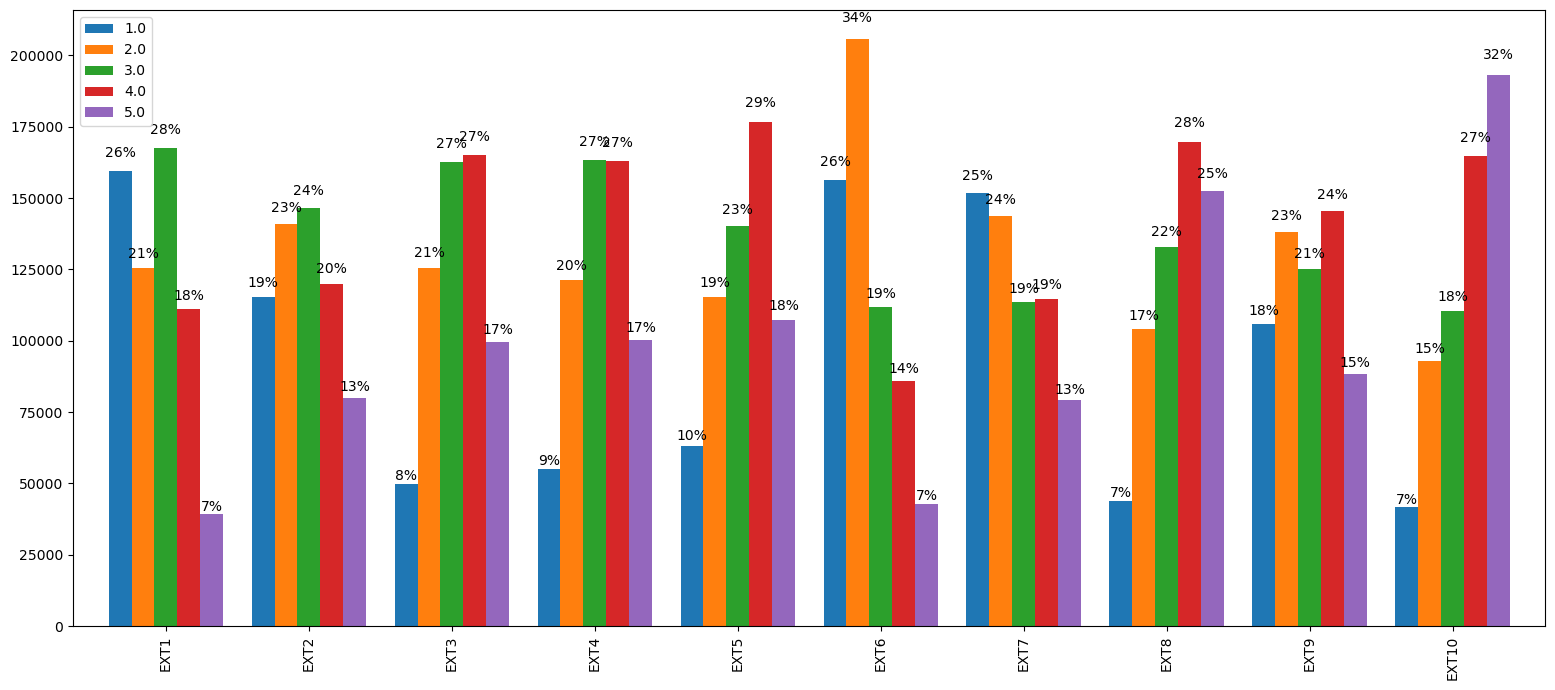

In [14]:
#Plotting the graph to see the statistics for each question.

plt.rcParams["figure.figsize"] = (19,8)
ch=df1.apply(pd.value_counts).T.plot.bar(width = 0.8)
h=0
for p in ch.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    h=height/df1.shape[0]
    ch.annotate(f'{h:.0%}', (x + width/2, y + height*1.03), ha='center')
    

<font color='#251749'>
    <b>Observations:</b>
    <br>
    <br>-> Most agreed question: EXT10 - I am quiet around strangers.
    <br>-> Most disagreed question: EXT6 - I have little to say.
</font>

<br>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;````````````````

<h3 style="color:#3A4F7A;" >
<br>NEUROTICISM</h3>
<font color='#251749'>
<br>Neuroticism describes the overall emotional stability of an individual through how they perceive the world. 
<br>
<br>High scorers tend to be anxious, experience stress, self-consciousness, vulnerable.
<br>
<br>Low scorers tend to be calm, emotionally stable, confident, resilient.
<br>
    <br><b>Questions to determine the Neuroticism</b>
    <img src="Images/neuro.jpg" width="700" height="800" align="right"/>
<br>
<br>EST1 - I get stressed out easily.
<br>EST2 - I am relaxed most of the time.
<br>EST3 - I worry about things.
<br>EST4 - I seldom feel blue. 
<br>EST5 - I am easily disturbed. 
<br>EST6 - I get upset easily.
<br>EST7 - I change my mood a lot.
<br>EST8 - I have frequent mood swings. 
<br>EST9 - I get irritated easily.
<br>EST10 - I often feel blue.
</font>
<br>
<br>

In [15]:
df2=df[['EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6','EST7', 'EST8', 'EST9', 'EST10']]
df2.columns
df2.head()

,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10
0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0
1,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0
2,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0
3,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0
5,3.0,4.0,3.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0


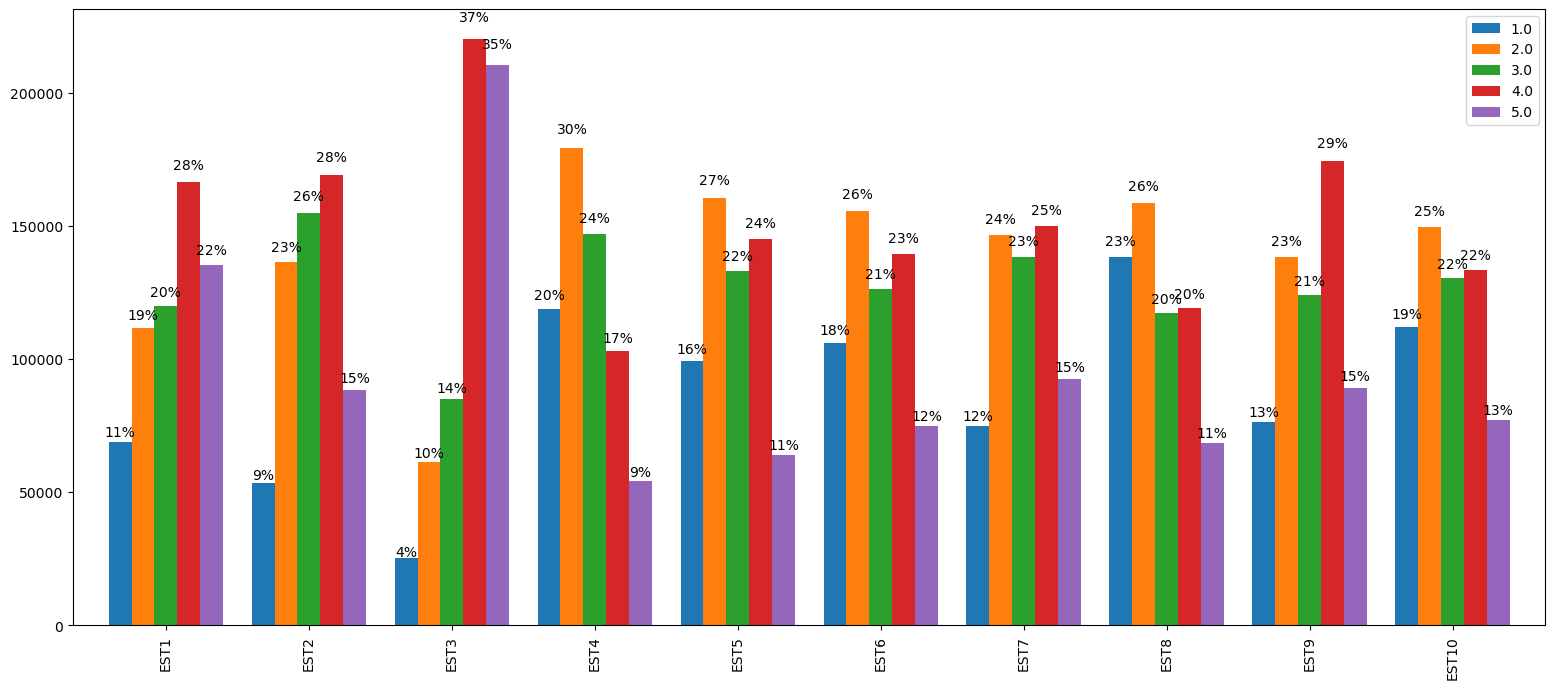

In [16]:
plt.rcParams["figure.figsize"] = (19,8)
ch=df2.apply(pd.value_counts).T.plot.bar(width = 0.8)
h=0
for p in ch.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    h=height/df2.shape[0]
    ch.annotate(f'{h:.0%}', (x + width/2, y + height*1.03), ha='center')

<font color='#251749'>
    <b>Observations:</b>
    <br>
    <br>-> Most agreed question: EST3 - I worry about things.
    <br>-> Most disagreed question: We have quite neutral responses for questions.
</font>

<br>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;````````````````

<h3 style="color:#3A4F7A;" >
<br>AGREEABLENESS</h3>
<font color='#251749'>
<br>Agreeableness focuses on people’s orientation and interactions with others 
<br>
<br>High scorers tend to be soft-hearted, straightforward, modest, trusting, sympathetic. People regard them as trustworthy and altruistic.
<br>
<br>Those low in agreeableness may be perceived as suspicious, manipulative, and uncooperative.Tend to be stubborn, demanding and sceptical.
<img src="Images/ag.jpg" width="400" height="400" align="right"/>
<br><b>Questions to determine Agreeableness</b>
   
<br>
<br>AGR1 - I feel little concern for others.
<br>AGR2 - I am interested in people.
<br>AGR3 - I insult people.
<br>AGR4 - I sympathize with others' feelings.
<br>AGR5 - I am not interested in other people's problems.
<br>AGR6 - I have a soft heart.
<br>AGR7 - I am not really interested in others.
<br>AGR8 - I take time out for others.
<br>AGR9 - I feel others' emotions.
<br>AGR10 - I make people feel at ease.
<br>
    <br>
</font>

In [17]:
df3=df[['AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7', 'AGR8', 'AGR9', 'AGR10']]
df3.columns
df3.head()

,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10
0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0
1,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0
2,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0
3,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0
5,2.0,3.0,1.0,4.0,2.0,3.0,2.0,3.0,4.0,4.0


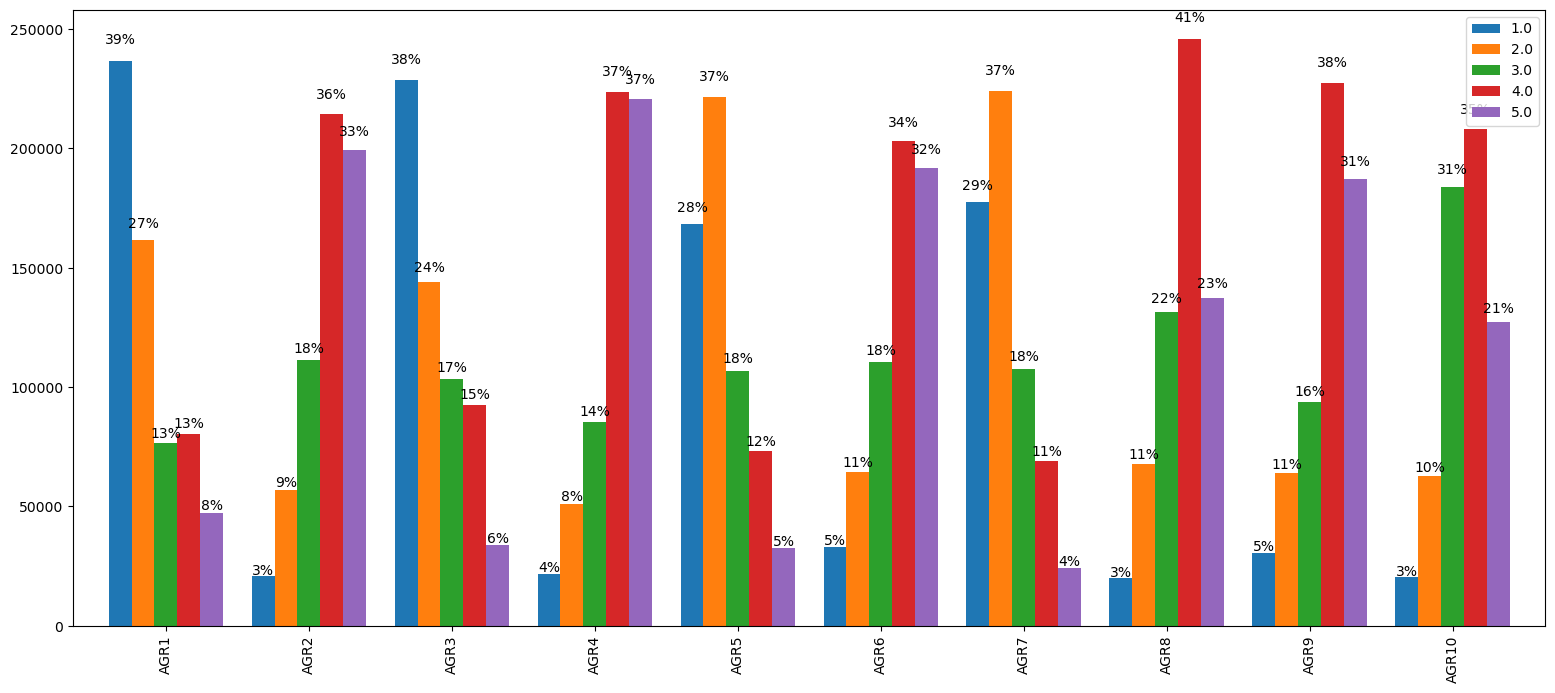

In [18]:
plt.rcParams["figure.figsize"] = (19,8)
ch=df3.apply(pd.value_counts).T.plot.bar(width = 0.8)
h=0
for p in ch.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    h=height/df3.shape[0]
    ch.annotate(f'{h:.0%}', (x + width/2, y + height*1.03), ha='center')

<font color='#251749'>
    <b>Observations:</b>
    <br>
    <br>-> Most agreed question:
        <br>&emsp;&emsp;AGR4 - I sympathize with others' feelings.
        <br>&emsp;&emsp;AGR2 - I am interested in people.
    <br>-> Most disagreed question: 
        <br>&emsp;&emsp;AGR1 - I feel little concern for others
        <br>&emsp;&emsp;AGR3 - I insult people

<br>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;````````````````

<h3 style="color:#3A4F7A;" >
<br>CONSCIENTIOUSNESS</h3>
<font color='#251749'>
<br>Conscientiousness describes a person’s ability to regulate their impulse control in order to engage in goal-directed behaviors. Measures control, inhibition, and persistency of behavior.
<br>
<br>High scorers on conscientiousness tend to be organized,disciplined, detail-oriented, thoughtful, and careful. Tend to be Self-disciplined, dutiful, competent.
<br>
<br>Low scorers on conscientiousness may struggle with impulse control, leading to difficulty in  completing tasks and fulfilling goals. Tend to procrastinate, disorganized, impulsive.<img src="Images/CSN.png" width="460" height="1000" align="right"/>
<br>
<br><b>Questions to determine Openness</b>
<br>
<br>CSN1 - I am always prepared.
<br>CSN2 - I leave my belongings around.
<br>CSN3 - I pay attention to details.
<br>CSN4 - I make a mess of things.
<br>CSN5 - I get chores done right away.
<br>CSN6 - I often forget to put things back in their proper place.
<br>CSN7 - I like order.
<br>CSN8 - I shirk my duties.
<br>CSN9 - I follow a schedule.
<br>CSN10 - I am exacting in my work.
<br><br>

In [19]:
df4=df[['CSN1', 'CSN2','CSN3', 'CSN4', 'CSN5', 'CSN6', 'CSN7', 'CSN8', 'CSN9', 'CSN10']]
df4.columns
df4.head()

,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10
0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0
1,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0
2,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0
3,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0
5,3.0,2.0,4.0,1.0,3.0,2.0,4.0,3.0,4.0,3.0


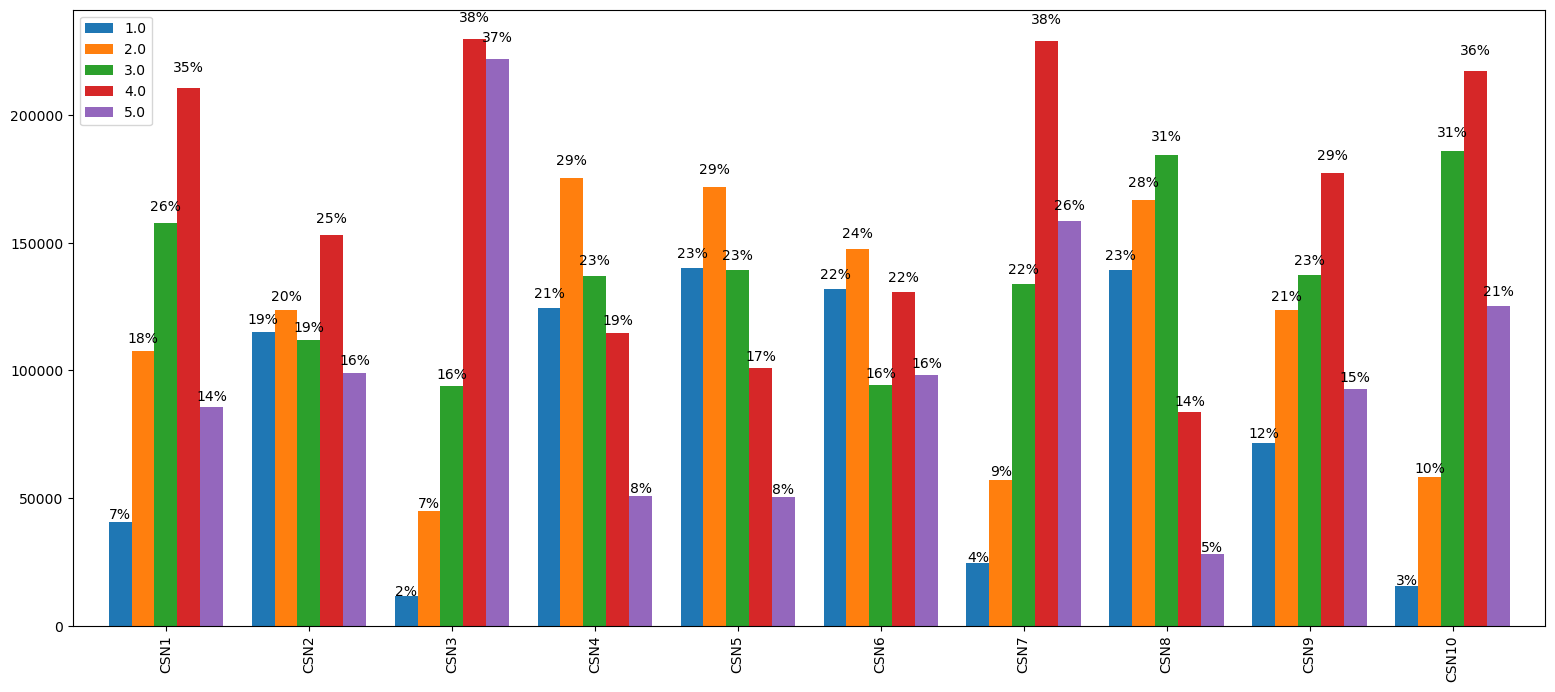

In [20]:
plt.rcParams["figure.figsize"] = (19,8)
ch=df4.apply(pd.value_counts).T.plot.bar(width = 0.8)
h=0
for p in ch.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    h=height/df4.shape[0]
    ch.annotate(f'{h:.0%}', (x + width/2, y + height*1.03), ha='center')

<font color='#251749'>
    <b>Observations:</b>
    <br>
    <br>-> Most agreed question: CSN3 - I pay attention to details.
    <br>-> Most disagreed question: We have quite neutral responses for questions.

<br>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;````````````````

<h3 style="color:#3A4F7A;" >
<br>OPENNESS TO EXPERIENCE</h3>
<font color='#251749'>
<br>Those who score high on openness to experience are perceived as creative and artistic. Prefer variety and value independence, curious to explore the unknown, welcome change.
<br>
<br>People who score low on openness to experience prefer routine. Uncomfortable with change and fear the unknown. Practical people with difficulty to think creatively or abstractly.<img src="Images/op.jpg"  width="350" height="100" align="right"/>
<br>
<br><b>Questions to determine Openness</b>
<br> 
    <img src="Images/r.webp"  width="300" height="200" align="right"/>   
<br>OPN1 - I have a rich vocabulary.
<br>OPN2 - I have difficulty understanding abstract ideas.
<br>OPN3 - I have a vivid imagination.
<br>OPN4 - I am not interested in abstract ideas.
<br>OPN5 - I have excellent ideas.
<br>OPN6 - I do not have a good imagination.
<br>OPN7 - I am quick to understand things.
<br>OPN8 - I use difficult words.
<br>OPN9 - I spend time reflecting on things.
<br>OPN10 - I am full of ideas.
<br><br>

In [21]:
df5=df[['OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5', 'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10']]
df5.columns
df5.head(6)

,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
5,5.0,1.0,5.0,1.0,3.0,1.0,5.0,4.0,5.0,2.0
6,5.0,2.0,4.0,3.0,4.0,1.0,5.0,5.0,4.0,4.0


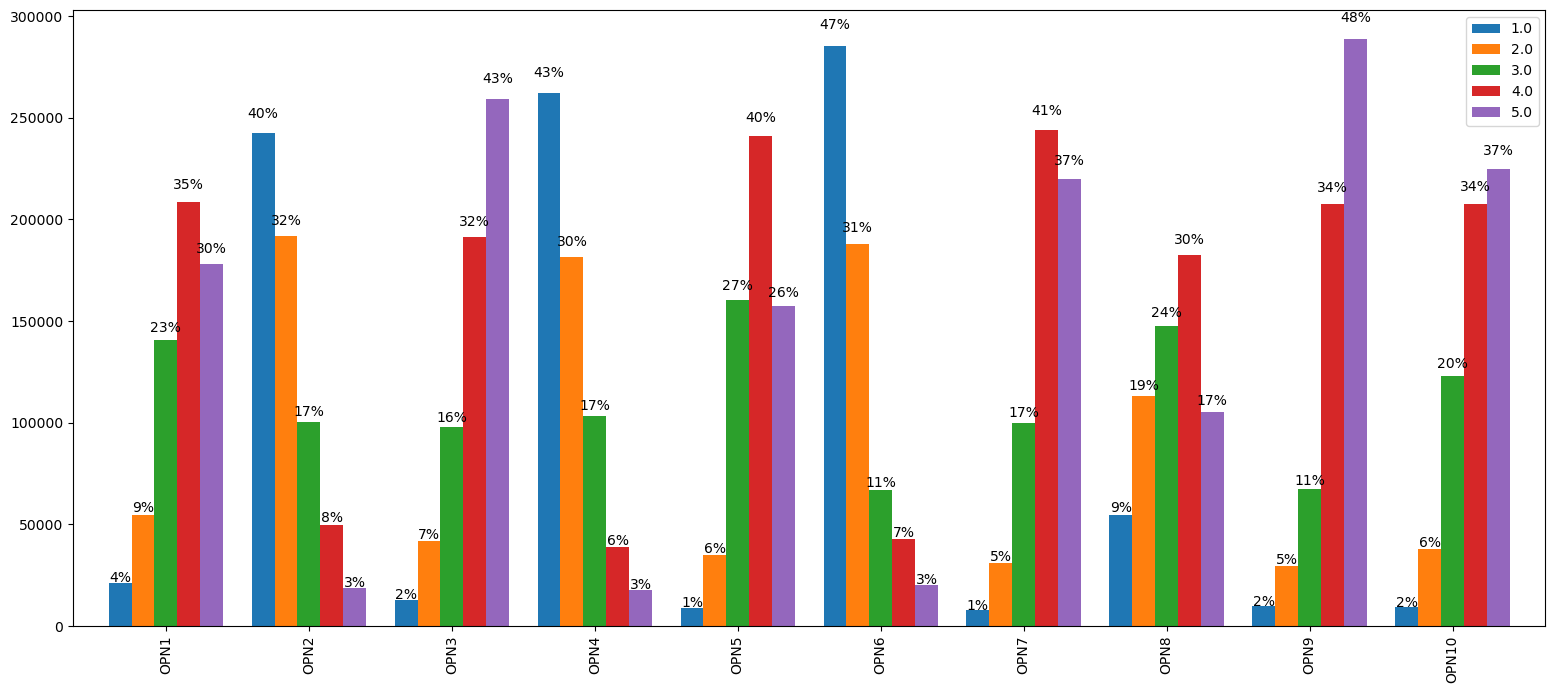

In [22]:
plt.rcParams["figure.figsize"] = (19,8)
ch=df5.apply(pd.value_counts).T.plot.bar(width = 0.8)
h=0
for p in ch.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    h=height/df5.shape[0]
    ch.annotate(f'{h:.0%}', (x + width/2, y + height*1.03), ha='center')

<font color='#251749'>
    <b>Observations:</b>
    <br>
    <br>-> Most agreed question: OPN9 - I spend time reflecting on things.
    <br>-> Most disagreed question:OPN6 - I do not have a good imagination.

 <br>``````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````

<h3 style="color:#3A4F7A;" >DISTRIBUTION OF 5 TRAITS</h3>

<font color='#251749'>
    <br>> Below is the equation to calculate each trait's score.
    <br>> Score ranges from 0 to 40 for each personality type.
    <br>> Positive questions are added, negative ones are subtracted.
    <br>
     <br> 

In [23]:
EXT=20+df['EXT1']-df['EXT2']+df['EXT3']-df['EXT4']+df['EXT5']-df['EXT6']+df['EXT7']-df['EXT8']+df['EXT9']-df['EXT10']
EST=38-df['EST1']+df['EST2']-df['EST3']+df['EST4']-df['EST5']-df['EST6']-df['EST7']-df['EST8']-df['EST9']-df['EST10']
AGR=14-df['AGR1']+df['AGR2']-df['AGR3']+df['AGR4']-df['AGR5']+df['AGR6']-df['AGR7']+df['AGR8']+df['AGR9']+df['AGR10']
CSN=14+df['CSN1']-df['CSN2']+df['CSN3']-df['CSN4']+df['CSN5']-df['CSN6']+df['CSN7']-df['CSN8']+df['CSN9']+df['CSN10']
OPN=8+df['OPN1']-df['OPN2']+df['OPN3']-df['OPN4']+df['OPN5']-df['OPN6']+df['OPN7']+df['OPN8']+df['OPN9']+df['OPN10']

In [24]:
data = {"EXT": EXT,
        "EST": EST,
        "AGR": AGR,
        "CSN": CSN,
        "OPN": OPN}
tot_df = pd.concat(data,axis = 1)
tot_df.head(8)

,EXT,EST,AGR,CSN,OPN
0,36.0,26.0,29.0,22.0,35.0
1,10.0,25.0,34.0,27.0,25.0
2,15.0,24.0,32.0,24.0,31.0
3,16.0,21.0,28.0,15.0,29.0
5,22.0,28.0,28.0,27.0,34.0
6,25.0,20.0,31.0,23.0,33.0
7,32.0,34.0,28.0,35.0,33.0
9,12.0,19.0,9.0,7.0,25.0


<font color='#251749'>Calculating the Frequency of each score ranging from 0 to 40.

In [25]:
tot_df.apply(pd.value_counts)

,EXT,EST,AGR,CSN,OPN
0.0,4670,3147,374,144,29
1.0,4440,2991,303,169,20
2.0,5753,4135,481,327,39
3.0,6913,5098,591,525,40
4.0,9551,7989,1027,1069,111
5.0,10154,8582,1115,1449,117
6.0,12217,10693,1434,2186,211
7.0,13152,11919,1623,2922,208
8.0,15199,15259,2197,4175,376
9.0,16254,15741,2478,5213,461


<font color='#251749'>Ploting a line graph to show the distribution.

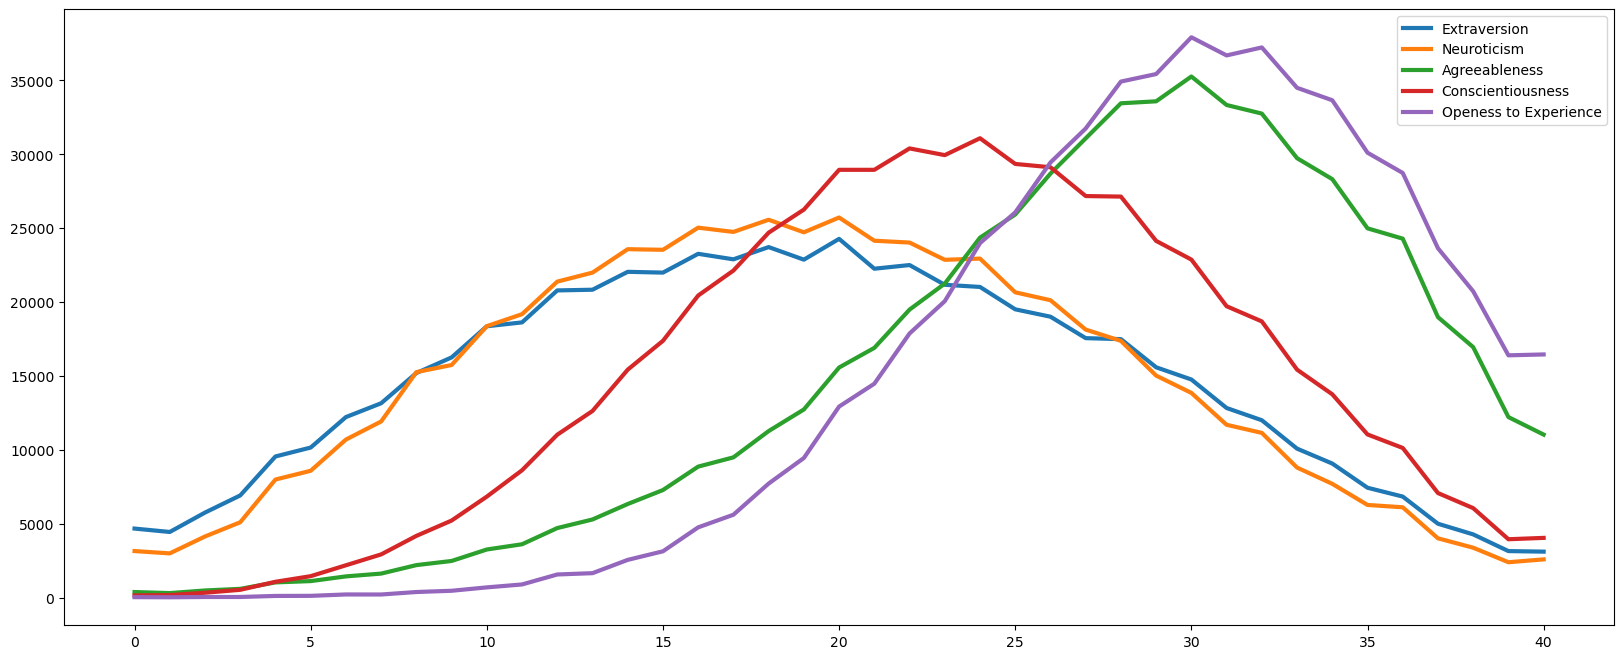

In [26]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,8)
#tot_df.apply(pd.value_counts).plot.bar(width = 0.8)
plt.plot(tot_df.apply(pd.value_counts), linewidth=3)
plt.legend(['Extraversion', 
            'Neuroticism',
           'Agreeableness',
           'Conscientiousness',
           'Openess to Experience'])
plt.show()

<font color='#251749'>From the plot, we can deduce that <b>"Openess to Experience"</b> is relatively prevelant trait among other traits.

 <br>``````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````

<h3 style="color:#3A4F7A;" >Correlation between Traits</h3>
<br>

In [27]:
cor_df= tot_df.corr()
cor_df

,EXT,EST,AGR,CSN,OPN
EXT,1.000000,0.224462,0.305576,0.068004,0.174617
EST,0.224462,1.000000,0.039964,0.235221,0.078996
AGR,0.305576,0.039964,1.000000,0.137030,0.101731
CSN,0.068004,0.235221,0.137030,1.000000,0.055035
OPN,0.174617,0.078996,0.101731,0.055035,1.000000


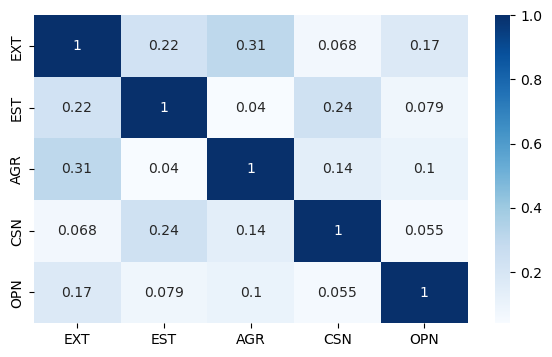

In [28]:
plt.rcParams["figure.figsize"] = (7,4) 
hm = sns.heatmap(data = cor_df,annot=True,cmap="Blues")
plt.show()

<font color='#251749'>We can see weak correlation between traits. 0.31 is the higest correlation between Extraversion and Agreeableness.

 <br>````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````

<h3 style="color:#3A4F7A;">
<br>Measuring the time taken to complete the survey
<br>
</h3>

<font color='#251749'> The time was measured in millisconds for each of the questions. We are summing up all the time for each section and converting to seconds.

In [29]:
EXT_Time=df.iloc[:,50:60].sum(axis=1)
EST_Time=df.iloc[:,60:70].sum(axis=1)
AGR_Time=df.iloc[:,70:80].sum(axis=1)
CSN_Time=df.iloc[:,80:90].sum(axis=1)
OPN_Time=df.iloc[:,90:100].sum(axis=1)

time_data={"EXT_Time":EXT_Time,
           "EST_Time":EST_Time,
           "AGR_Time":AGR_Time,
           "CSN_Time":CSN_Time,
            "OPN_Time":OPN_Time}

time_taken = pd.concat(time_data,axis = 1)

time_taken['time_taken_total']= time_taken.sum(axis=1)
time_taken.head()

,EXT_Time,EST_Time,AGR_Time,CSN_Time,OPN_Time,time_taken_total
0,46568.0,47699.0,52419.0,49929.0,35571.0,232186.0
1,37527.0,34479.0,29662.0,42629.0,32604.0,176901.0
2,47347.0,35996.0,36975.0,34700.0,29522.0,184540.0
3,44948.0,40478.0,52016.0,43177.0,37643.0,218262.0
5,44137.0,29509.0,37211.0,50927.0,30593.0,192377.0


<font color='#251749'>Plotting the graph for time taken to complete each personality type questions.

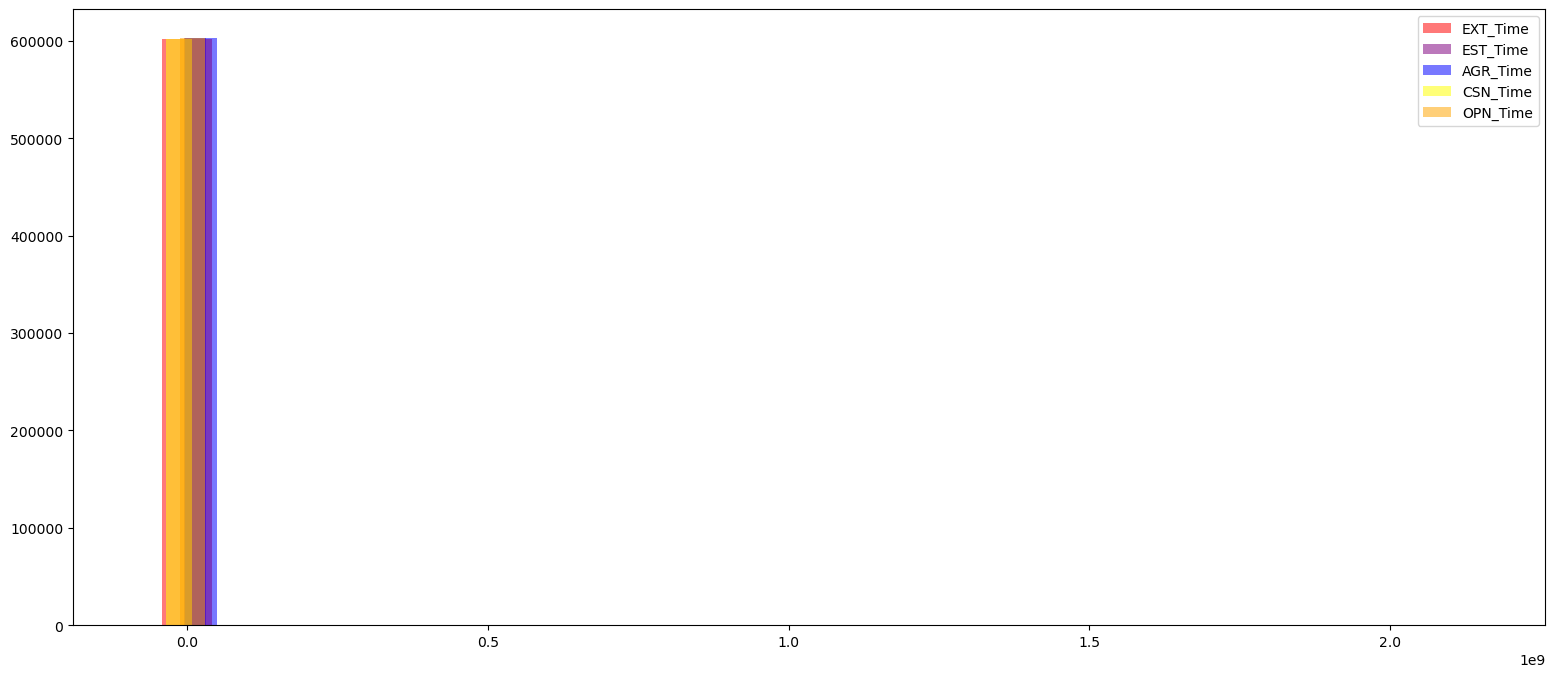

In [30]:
plt.rcParams["figure.figsize"] = (19,8)
plt.hist(time_taken['EXT_Time'], bins=26, alpha=0.53, color='red')
plt.hist(time_taken['EST_Time'], bins=26, alpha=0.53, color='purple')
plt.hist(time_taken['AGR_Time'], bins=26, alpha=0.53, color='blue')
plt.hist(time_taken['CSN_Time'], bins=26, alpha=0.53, color='yellow')
plt.hist(time_taken['OPN_Time'], bins=26, alpha=0.53, color='orange')

plt.legend(['EXT_Time', 
            'EST_Time',
           'AGR_Time',
           'CSN_Time',
           'OPN_Time'])

plt.show()

<font color='#251749'> Due to large outliers we do not see much variation. We need to exclude the fastest and slowest response times to get the time plot. 

In [31]:
#Slowest response time
time_taken['time_taken_total'].min()

-78732580.0

In [32]:
#fastest response time
time_taken['time_taken_total'].max()

2147710653.0

In [33]:
time_taken = time_taken[time_taken['time_taken_total'].between(10000,1000000)]
time_taken.min()

EXT_Time            -84913.0
EST_Time            -66876.0
AGR_Time            -57783.0
CSN_Time            -90284.0
OPN_Time           -483693.0
time_taken_total     10148.0
dtype: float64

In [34]:
#converting milliseconds to seconds
time_taken= time_taken.apply(lambda x: x*0.001)

In [35]:
time_taken.describe()

,EXT_Time,EST_Time,AGR_Time,CSN_Time,OPN_Time,time_taken_total
count,585401.000000,585401.000000,585401.000000,585401.000000,585401.000000,585401.000000
mean,57.094576,45.639919,49.365196,52.995565,44.796476,249.891732
std,52.272716,36.263239,38.081414,41.052333,35.589489,133.274366
min,-84.913000,-66.876000,-57.783000,-90.284000,-483.693000,10.148000
25%,34.509000,28.164000,31.295000,32.139000,28.139000,166.020000
50%,44.839000,36.917000,40.562000,42.516000,36.456000,213.263000
75%,61.055000,50.766000,54.816000,59.512000,49.378000,287.189000
max,992.229000,892.400000,918.750000,916.581000,875.014000,999.992000


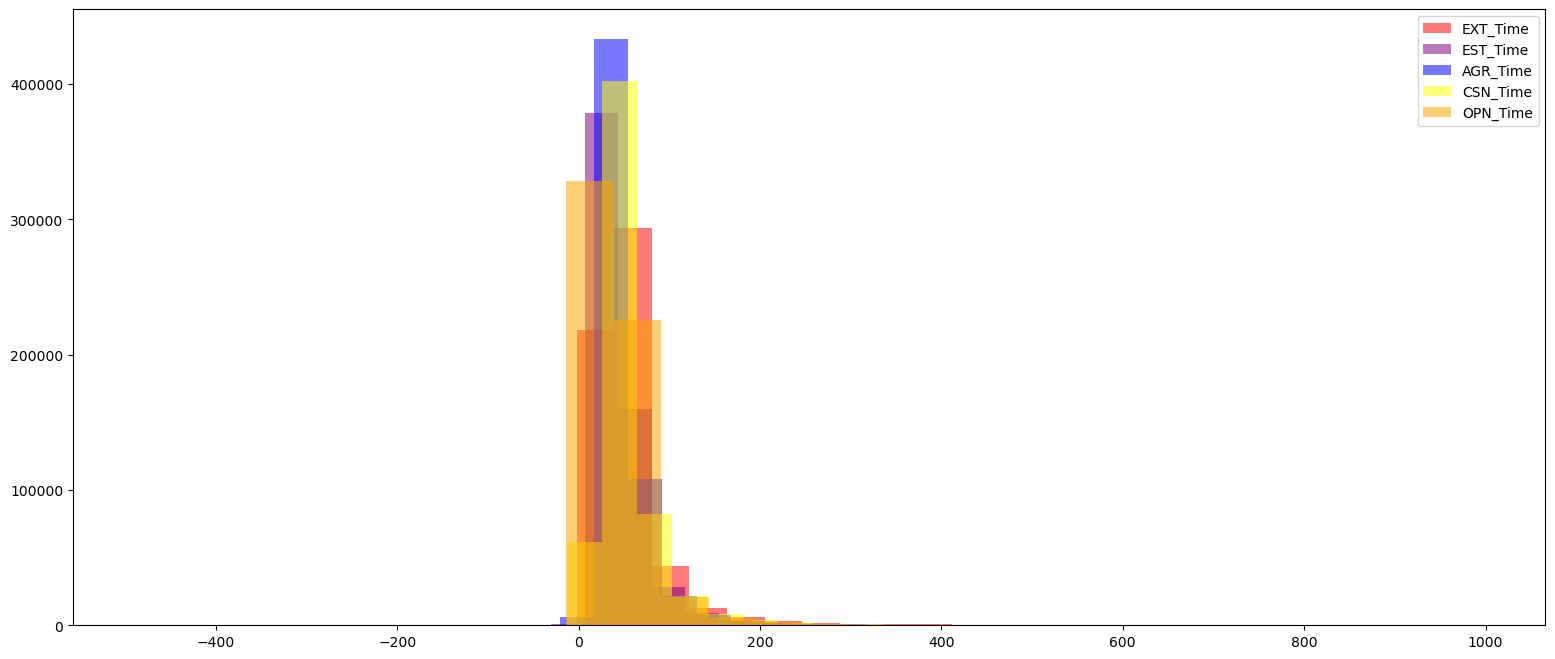

In [36]:
#plotting the graph for each section 
plt.rcParams["figure.figsize"] = (19,8)
plt.hist(time_taken['EXT_Time'], bins=26, alpha=0.53, color='red')
plt.hist(time_taken['EST_Time'], bins=26, alpha=0.53, color='purple')
plt.hist(time_taken['AGR_Time'], bins=26, alpha=0.53, color='blue')
plt.hist(time_taken['CSN_Time'], bins=26, alpha=0.53, color='yellow')
plt.hist(time_taken['OPN_Time'], bins=26, alpha=0.53, color='orange')

plt.legend(['EXT_Time', 
            'EST_Time',
           'AGR_Time',
           'CSN_Time',
           'OPN_Time'])


plt.show()

In [37]:
time_taken['time_taken_total'].describe()

count    585401.000000
mean        249.891732
std         133.274366
min          10.148000
25%         166.020000
50%         213.263000
75%         287.189000
max         999.992000
Name: time_taken_total, dtype: float64

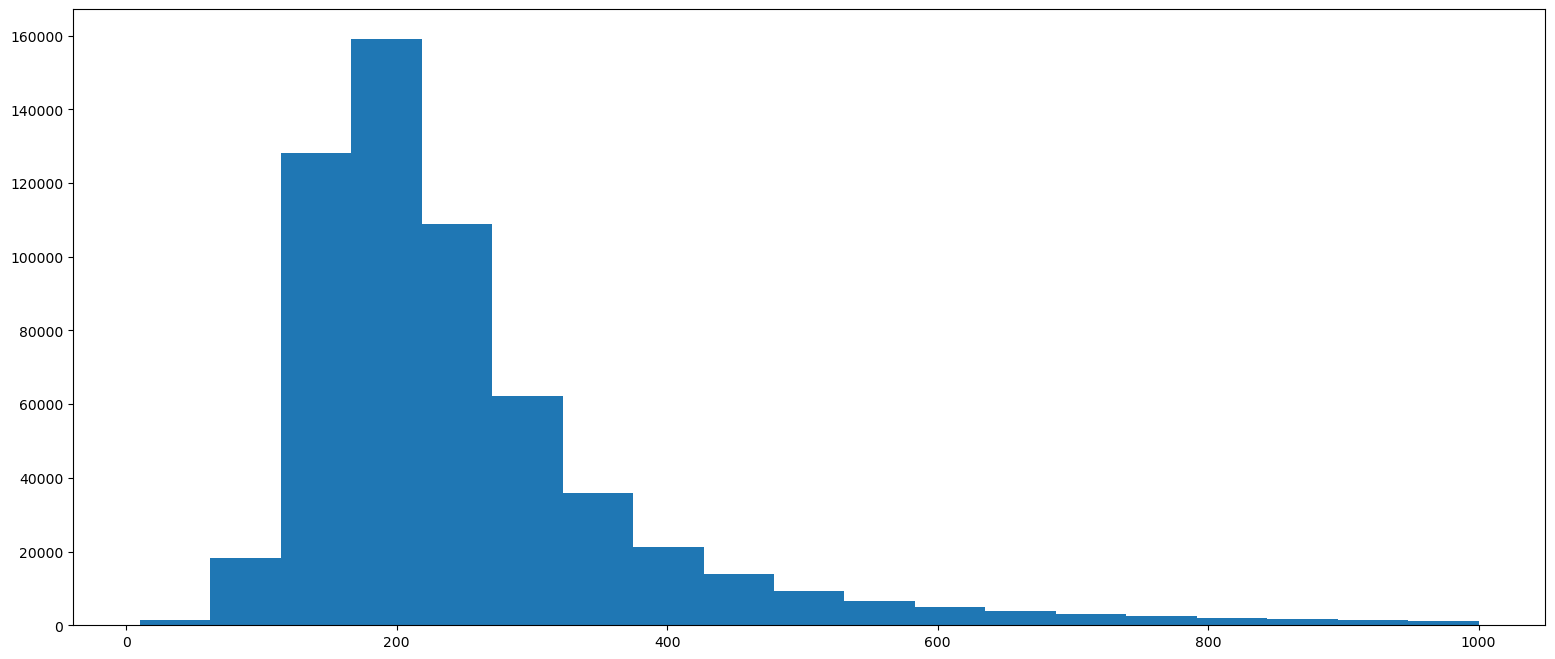

In [38]:
#Plotting the graph for total time taken to complete the entire survey.
plt.rcParams["figure.figsize"] = (19,8)
plt.hist(time_taken['time_taken_total'], bins=19, alpha=1)
plt.show()

<font color='#251749'>From the above, 75% of the participants have completed the survey within 300 seconds or 5 mins. 